In [8]:
%matplotlib inline

import numpy as np
import pylab as plt
from skimage.measure import find_contours
import ccgpack as ccg

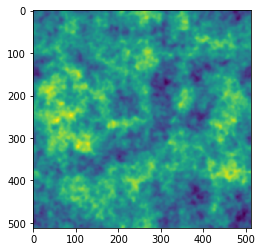

In [9]:
nside,size = 512,8
cl = np.load('../data/cl_planck_lensed.npy')
sfs = ccg.StochasticFieldSimulator(cl)
m = sfs.simulate(nside,size)
plt.imshow(m)

In [2]:
def G_r(data,th,percent):
    data -= data.mean()
    data /= data.std()
    contour = find_contours(data,th)
    n_c=len(contour)   
    print('find ',n_c ,'conours and select ',percent,'% of points (;')
    R_max=0
    c=np.zeros(1)
    n=0
    delta=1
    for k in range(n_c):       
        len_contour=int(len(contour[k]))
        n_c1=np.random.randint(len_contour,size=int(len_contour*percent/100))
        d=contour[k][[n_c1]]
        len_d=int(len(d))
        for i in range(len_d):
            for j in range(i+1,len_d):
                x=d[i,0]-d[j,0]
                y=d[i,1]-d[j,1]
                r=int(np.sqrt((x**2)+(y**2))/delta)
                R_max=max(r,R_max)
                c.resize(R_max+1)
                c[r]=c[r]+1
                n+=1
    C=c/n
    G=[]
    for i in range(len(C)):
        if C[i]>0:
            G.append([i,C[i]])
    return np.array(G)

In [13]:
y = G_r(data,0,50)

('find ', 2363, 'conours and select ', 50, '% of points (;')


In [14]:
y.shape

(548, 2)

(300, 400)

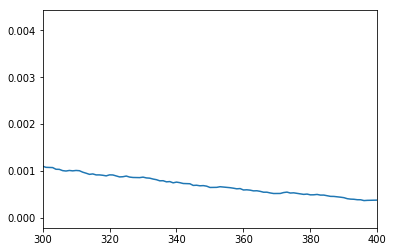

In [20]:
plt.plot(y[:,0],y[:,1])
plt.xlim(300,400)

In [11]:
def G1_r(data,th,percent):
    data -= data.mean()
    data /= data.std()
    contour = find_contours(data,th)
    n_c=len(contour)   
    print('find ',n_c ,'conours and select ',percent,'% of points (;')
    o=[]
    delta=1
    for k in range(n_c):
        R_max=0
        c=np.zeros(1)
        n=0
        len_contour=int(len(contour[k]))
        n_c1=np.random.randint(len_contour,size=int(len_contour*percent/100)+1)
        d=contour[k][[n_c1]]
        len_d=int(len(d))
        for i in range(len_d):
            for j in range(i+1,len_d):
                x=d[i,0]-d[j,0]
                y=d[i,1]-d[j,1]
                r=int(np.sqrt((x**2)+(y**2))/delta)
                R_max=max(r,R_max)
                c.resize(R_max+1)
                c[r]=c[r]+1
                n+=1
        C=c/n
        G=[]
        for i in range(len(C)):
            if C[i]>0:
                G.append([i,C[i]])
        o.append(np.array(G))
    q=o
    m=0
    for i in range(len(q)):
        if len(q[i])>0:          
            m=max(m,max(q[i][:,0]))
   
    m=int(m)
    print(m)
    Cc=np.zeros((m+1,2))
    Cc[:,0]=np.arange(0,m+1,1)
    for i in range(len(q)):
        for j in range(len(q[i])):
            Cc[int(q[i][j,0]),1]+=q[i][j,1]
    Cc[:,1]/=n_c
    return Cc

In [12]:
z = G1_r(m,0,50)

find  123 conours and select  50 % of points (;


/home/gf/packages/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app


514


In [15]:
sum(z[:,1])

1.0000000000000018

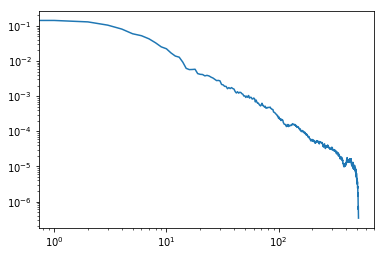

In [14]:
plt.loglog(z[:,0],z[:,1])
#plt.xlim(300,400)